# Task3 :  CUSTOMER CHURN Prediction 

  

**Background:**

In the subscription-based business landscape, customer churn is a critical concern. Predicting customer churn accurately is essential for retaining customers and ensuring business growth. By analyzing historical customer data, including usage behavior and demographics, businesses can identify patterns leading to churn and take proactive measures to retain customers.

**Problem Statement:**

Develop a precise churn prediction model using historical customer data. The goal is to determine whether a customer will churn (1) or not (0) based on their features, employing techniques like Logistic Regression, Random Forests, or Gradient Boosting.


**Approach:**

In predicting customer churn for subscription-based services, our approach involves leveraging historical customer data encompassing usage behavior and customer demographics. We aim to employ several machine learning algorithms to effectively predict churn. The focus will be on selecting and comparing the performance of diverse algorithms tailored for binary classification tasks like customer churn prediction. The models we will explore include:

1. **Logistic Regression:**
   - Logistic Regression is a foundational algorithm for binary classification. Its simplicity and interpretability make it an excellent starting point. We'll assess its performance in capturing linear relationships within the data.

2. **Random Forest:**
   - Random Forest, an ensemble learning technique, is capable of capturing complex interactions in the data. Its ability to handle numerous features and identify non-linear patterns makes it a strong contender for churn prediction.

3. **Gradient Boosting:**
   - Gradient Boosting is an ensemble method that builds multiple decision trees sequentially, where each tree corrects the errors of its predecessor. It excels in capturing subtle patterns in the data and is effective for improving predictive accuracy.


# Approach & Process:

###  1. Data Gathering
###  2. Data Cleaning 
###  3. Data Visualization and Exploration
###  4. Data Preprocessing
###  5. Model Selection and Fine-Tuning
###  6. Model Training, Optimization, and Validation

# Import necessary libraries


In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix ,precision_score ,recall_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler


# 1. Data Gathering:
Our dataset, sourced exclusively from Kaggle, provides the fundamental data for our Customer Churn Prediction system. This dataset, comprising historical customer information, serves as a rich source for training our predictive model. Through rigorous analysis of this Kaggle dataset, our model gains insights into customer behaviors, enabling accurate churn predictions.

In [2]:
data = pd.read_csv("./CUSTOMER CHURN Prediction Dataset/Churn_Modelling.csv")
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
## Check the size
data.shape

(10000, 14)

In [4]:
## Basic info on data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset contains a mix of numerical and categorical data, providing valuable information for analyzing customer churn in the context of a subscription-based service.

In [5]:
## Check basic statistic
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
## Check basic statistic
data.describe(include = "all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# 2. Data Cleaning 
    In the Data Cleaning  step, the dataset undergoes essential operations:

1. **Removing Duplicates:**
   Identical entries are eliminated, ensuring each data point is unique.

2. **Removing NaN Rows and Columns:**
   Rows and columns with missing values are deleted, ensuring data integrity.


In [7]:
## Check for Duplicates and Remove them
data.duplicated().sum() ## Will give us a number of duplicates


0

In [8]:
## Check for nan values

data.isna().sum()  # Will check for any duplicates


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
## Remove unnecessary columns

data.drop(["RowNumber","CustomerId"],axis = 1, inplace = True)
data.head(10)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [10]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

An imbalanced class distribution can lead the model to favor the majority class, making it less accurate in predicting the minority class (churned customers). Techniques like resampling and using appropriate evaluation metrics are employed to address this issue, ensuring balanced predictions for both classes.

In [11]:
data.shape

(10000, 12)

# 3. Data Visualization and Exploration
    In this step, we'll analyze the dataset using histograms and bar charts to understand numerical and categorical distributions.

## 1. Distribution of Customer Churn:

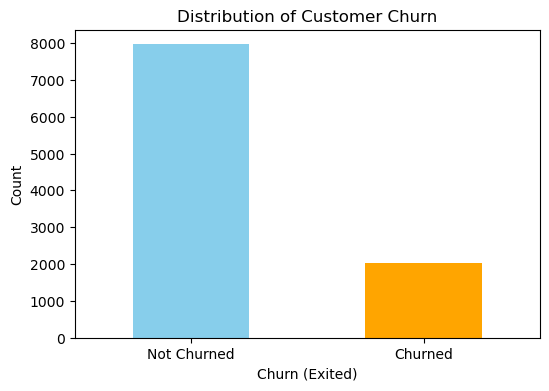

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
data['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Churn (Exited)')
plt.ylabel('Count')
plt.title('Distribution of Customer Churn')
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.show()


## 2. Age Distribution of Customers:

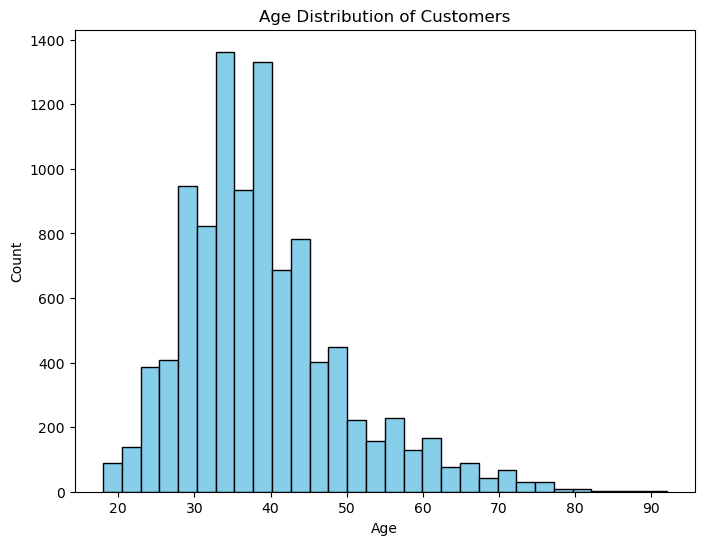

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Customers')
plt.show()


## 3. Geographical Distribution of Customers:

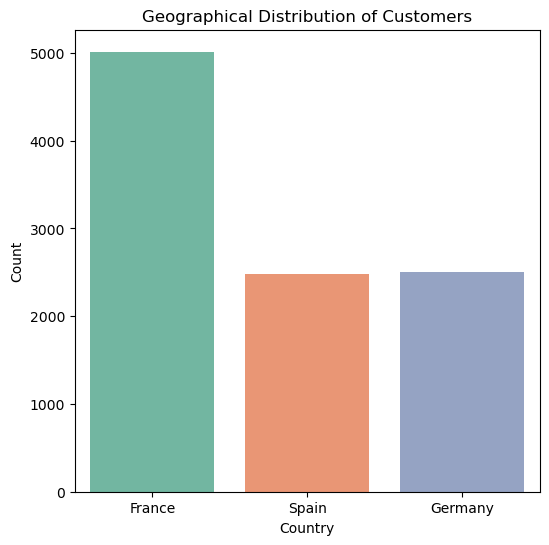

In [14]:
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.countplot(x='Geography', data=data, palette='Set2')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Geographical Distribution of Customers')
plt.show()


## 4. Churn by Tenure:

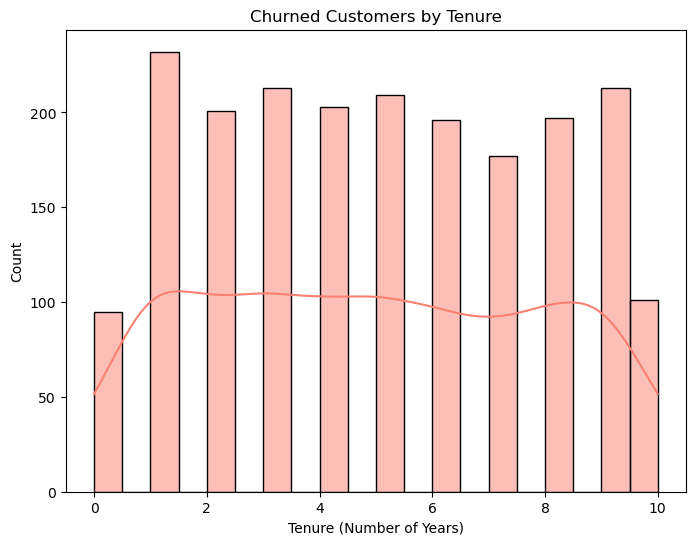

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data[data['Exited'] == 1]['Tenure'], bins=20, kde=True, color='salmon')
plt.xlabel('Tenure (Number of Years)')
plt.ylabel('Count')
plt.title('Churned Customers by Tenure')
plt.show()


## 5. Gender Distribution:

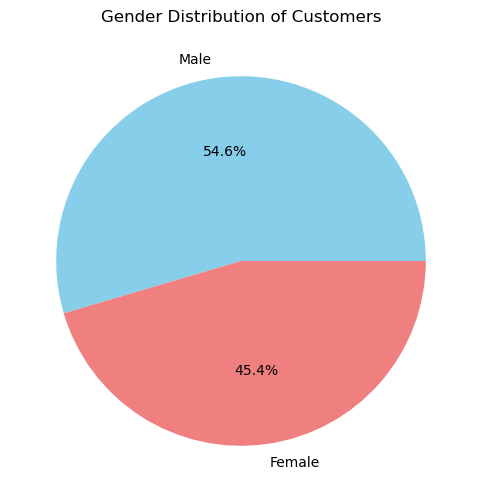

In [16]:
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Customers')
plt.ylabel('')
plt.show()


## 6. Relationship between Balance and Churn:

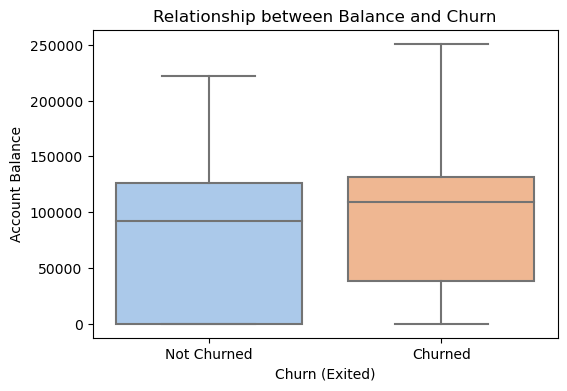

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='Balance', data=data, palette='pastel')
plt.xlabel('Churn (Exited)')
plt.ylabel('Account Balance')
plt.title('Relationship between Balance and Churn')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()


## 7. Churn by Number of Products:

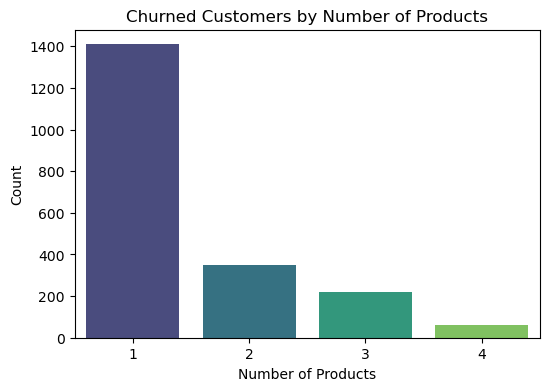

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='NumOfProducts', data=data[data['Exited'] == 1], palette='viridis')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Churned Customers by Number of Products')
plt.show()


## 8. Churn by Age:

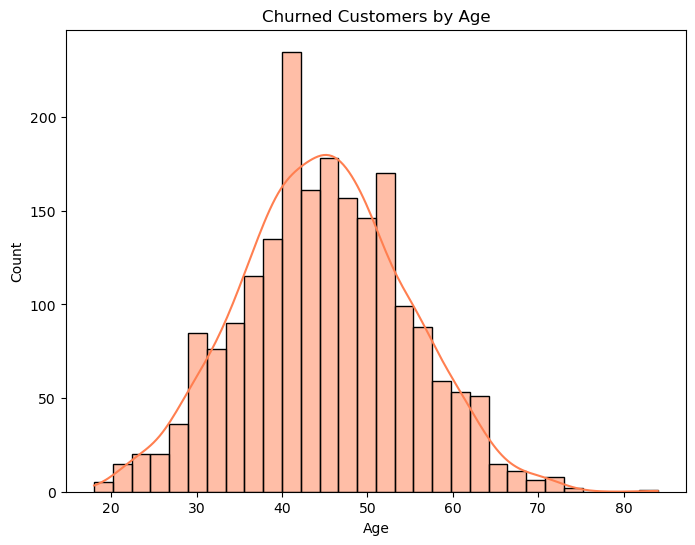

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data[data['Exited'] == 1]['Age'], bins=30, kde=True, color='coral')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Churned Customers by Age')
plt.show()


## 9. Churn by Gender:

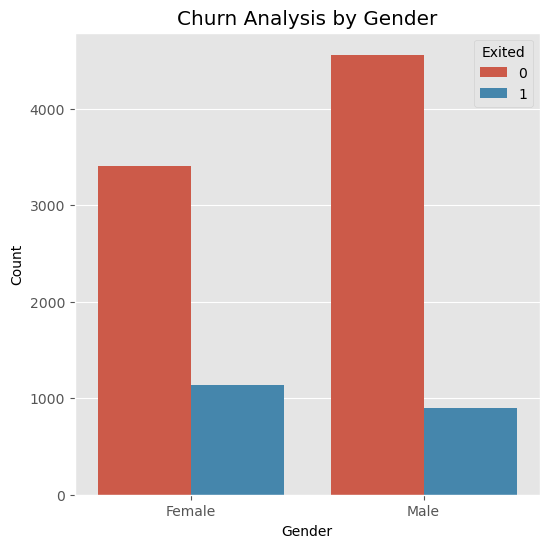

In [20]:

plt.figure(figsize=(6, 6))
plt.style.use("ggplot")
sns.countplot(x=data["Gender"], hue="Exited", data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Analysis by Gender')
plt.show()


## 10. Churn Analysis:

C:\Users\User\AppData\Local\Temp\ipykernel_13220\2567123831.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


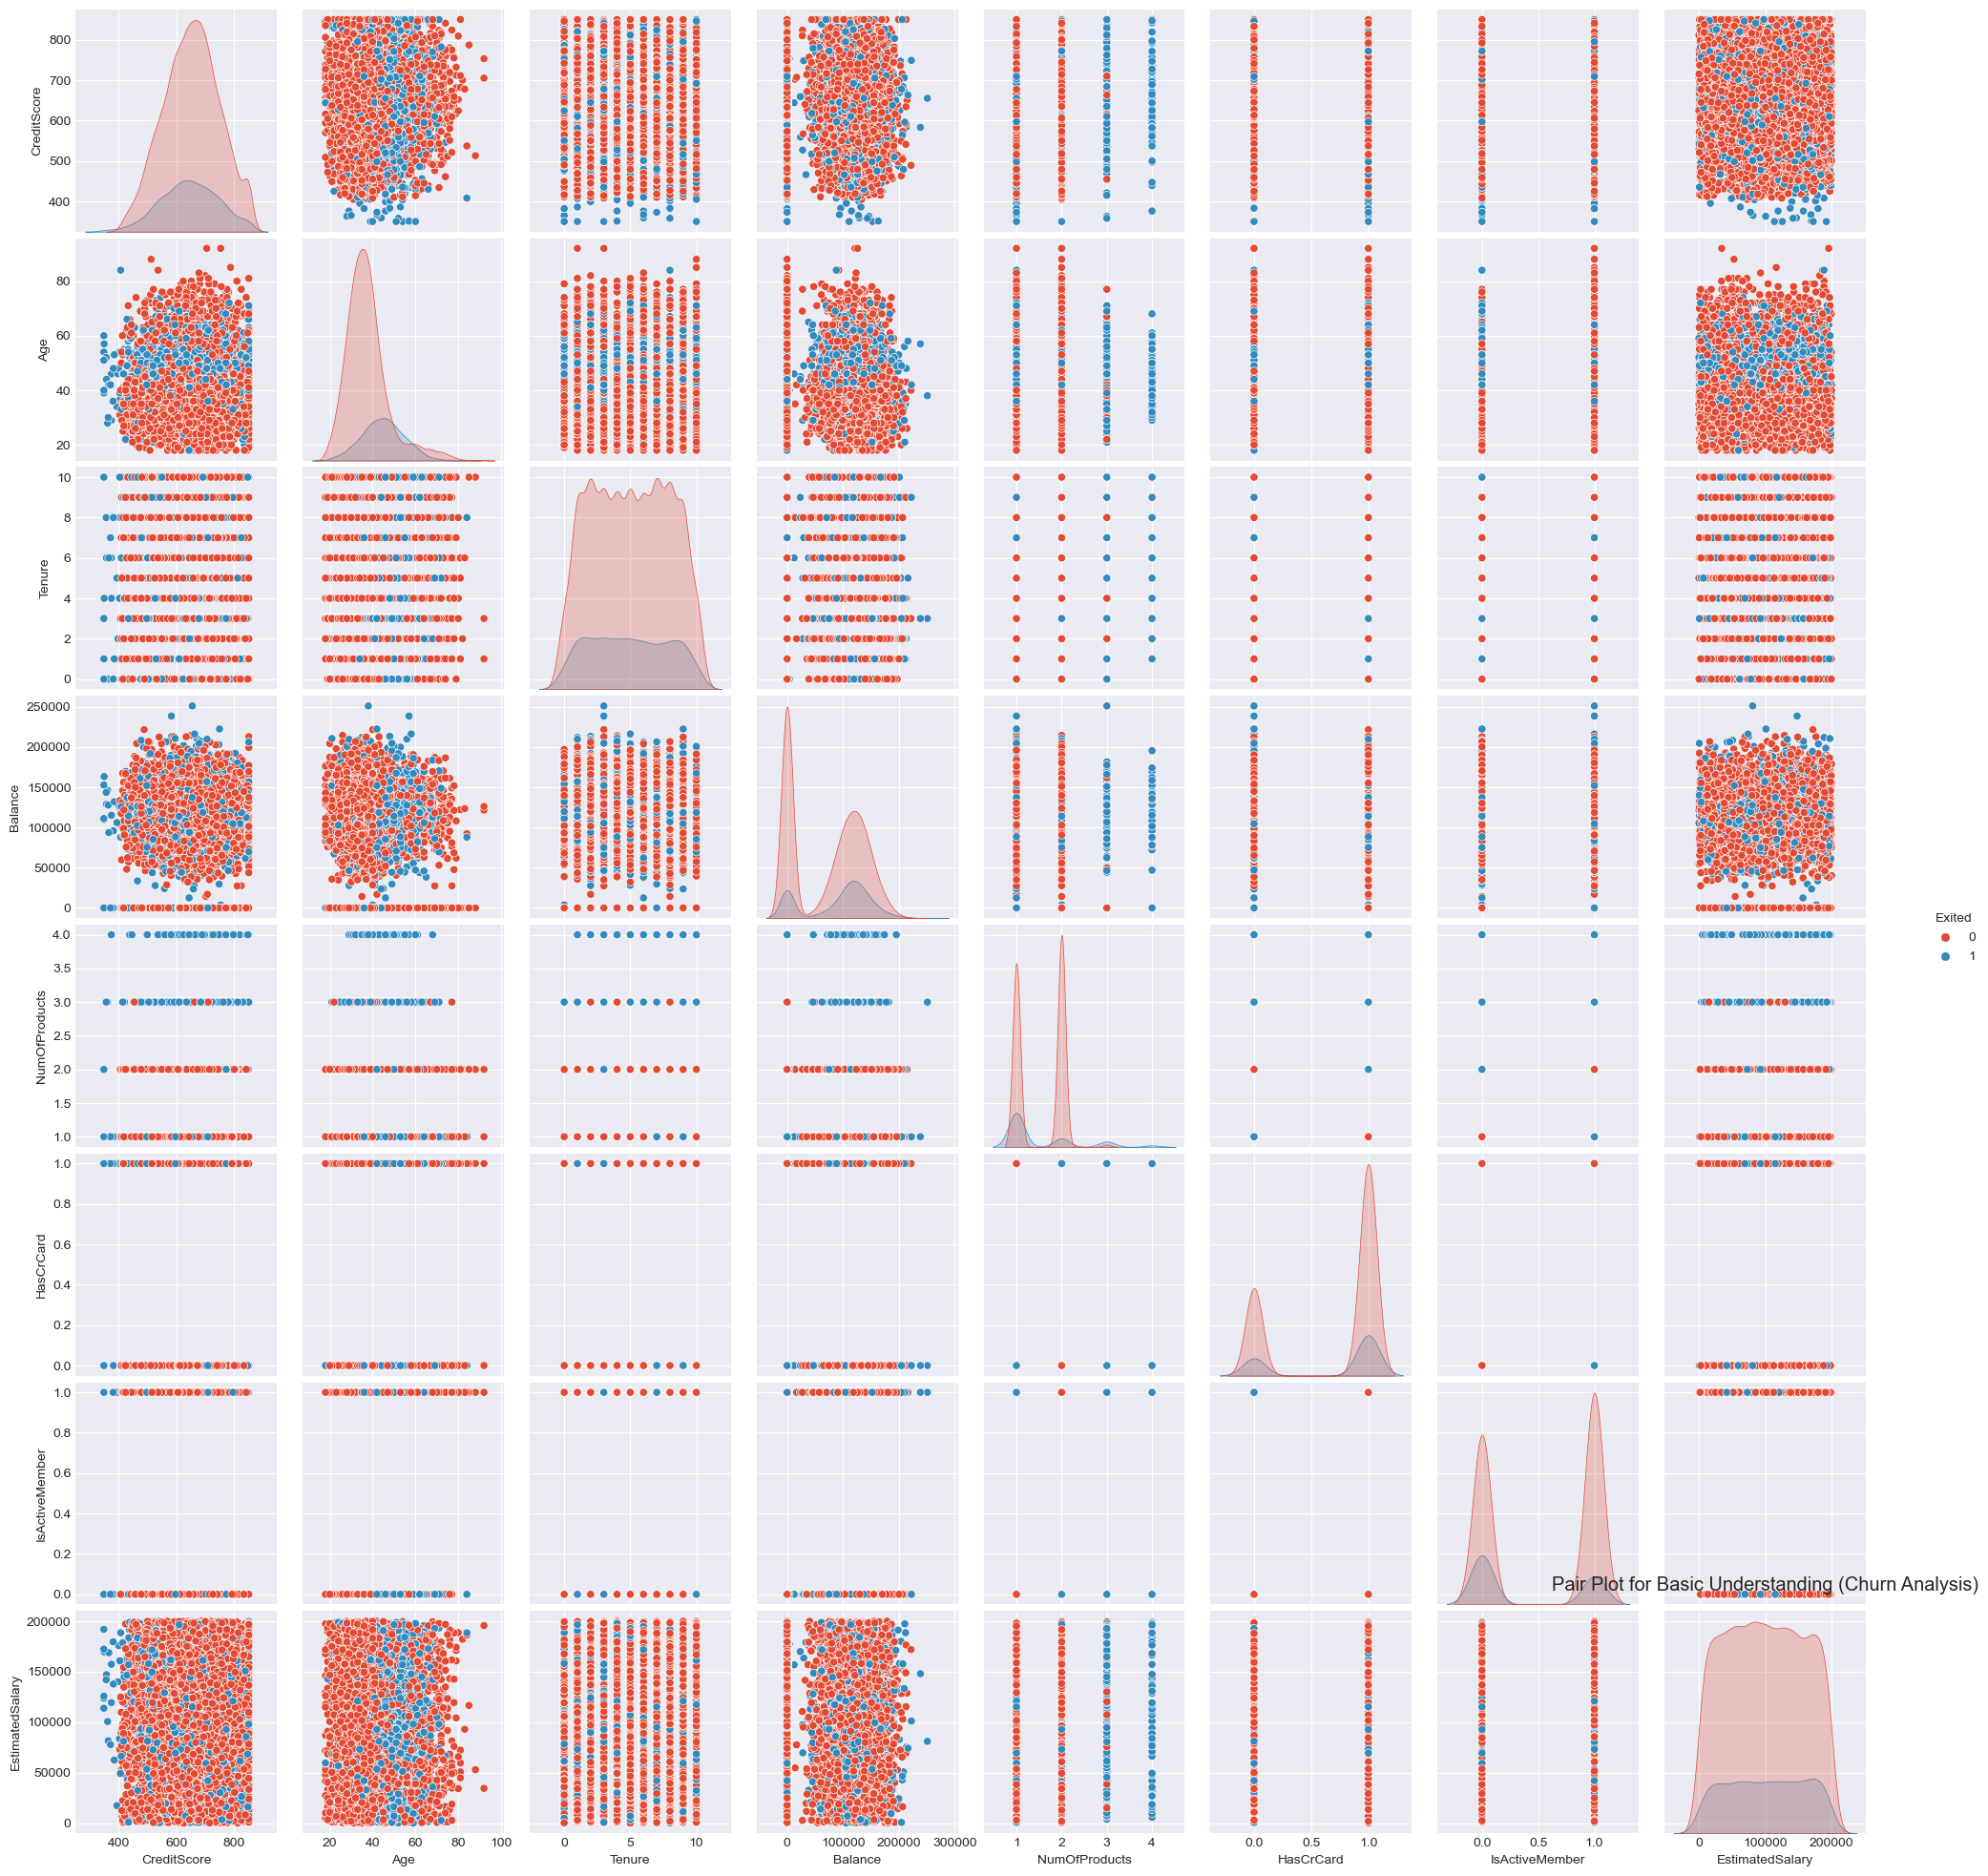

In [21]:
# Visualization: Pair Plot for Basic Understanding
plt.style.use("seaborn-darkgrid")
sns.pairplot(data, hue="Exited")
plt.title('Pair Plot for Basic Understanding (Churn Analysis)')
plt.show()


# 4. Data Preprocessing

# Imbalance Data

In [22]:
# Initialize the encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

categorical = ["Surname","Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]
numeric = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

transformer = ColumnTransformer([("cat",encoder,categorical),
                              ("num",scaler, numeric)])
x = data.drop("Exited" ,axis = 1)
y = data["Exited"]

transform = transformer.fit_transform(x)

print("transform shape :",transform.shape)
print("y shape :",y.shape)

transform shape : (10000, 2950)
y shape : (10000,)


In [23]:
## Split the data to train test

x_train ,x_test ,y_train ,y_test = train_test_split (transform ,y ,test_size = 0.2 ,random_state = 42)

In [24]:
x_train.shape

(8000, 2950)

In [25]:
x_test.shape

(2000, 2950)

In [26]:
y_train.shape

(8000,)

In [27]:
y_test.shape

(2000,)

# 5.  Model Selection and Fine-Tuning or Evaluation

1. **Model Options:**
   - Consider Logistic Regression, Random Forest, and Gradient Boosting.

2. **Data Splitting:**
   - Divide the dataset into training and testing sets (e.g., 80-20 split).

3. **Training:**
   - Train models with default parameters on the training data.

4. **Evaluation:**
   - Use metrics like accuracy, precision, recall, and F1-score for evaluation.
   - Apply cross-validation techniques for robust assessment.

5. **Hyperparameter Tuning:**
   - Fine-tune Random Forest and Gradient Boosting using grid/random search.

6. **Comparison:**
   - Compare models based on evaluation metrics.

7. **Deployment and Monitoring:**
   - Deploy the best-performing model and establish continuous monitoring for accuracy and relevance. Update the model as needed based on changing data patterns.

In [28]:
class_names = [0, 1]
print(class_names)


[0, 1]


In [29]:
data.head(10)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### GradientBoostingClassifier

In [30]:

mnb = GradientBoostingClassifier()
mnb.fit(x_train, y_train)

# Evaluate the model
train_accuracy = mnb.score(x_train, y_train)
test_accuracy = mnb.score(x_test, y_test)

# Print model accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions and display classification report
y_pred = mnb.predict(x_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)




Training Accuracy: 0.87
Test Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



- **Model Selection:**
  - GradientBoostingClassifier
- **Training Accuracy:**
  - Achieves 87% accuracy on the training data.
- **Test Accuracy:**
  - Maintains 86% accuracy on the test data.
- **Churned Customer (Class 1) Metrics:**
  - Precision: 75%
  - Recall: 46%
  - F1-score: 57%
- **Non-Churned Customer (Class 0) Metrics:**
  - Precision: 88%
  - Recall: 96%
  - F1-score: 92%
- **Overall Model Performance:**
  - Provides an 86% accuracy on the test data.
- **Observations:**
  - High accuracy in identifying non-churned customers (class 0).
  - Room for improvement in identifying churned customers (class 1), particularly in recall.
- **Recommendations:**
  - Address class imbalance using resampling techniques.

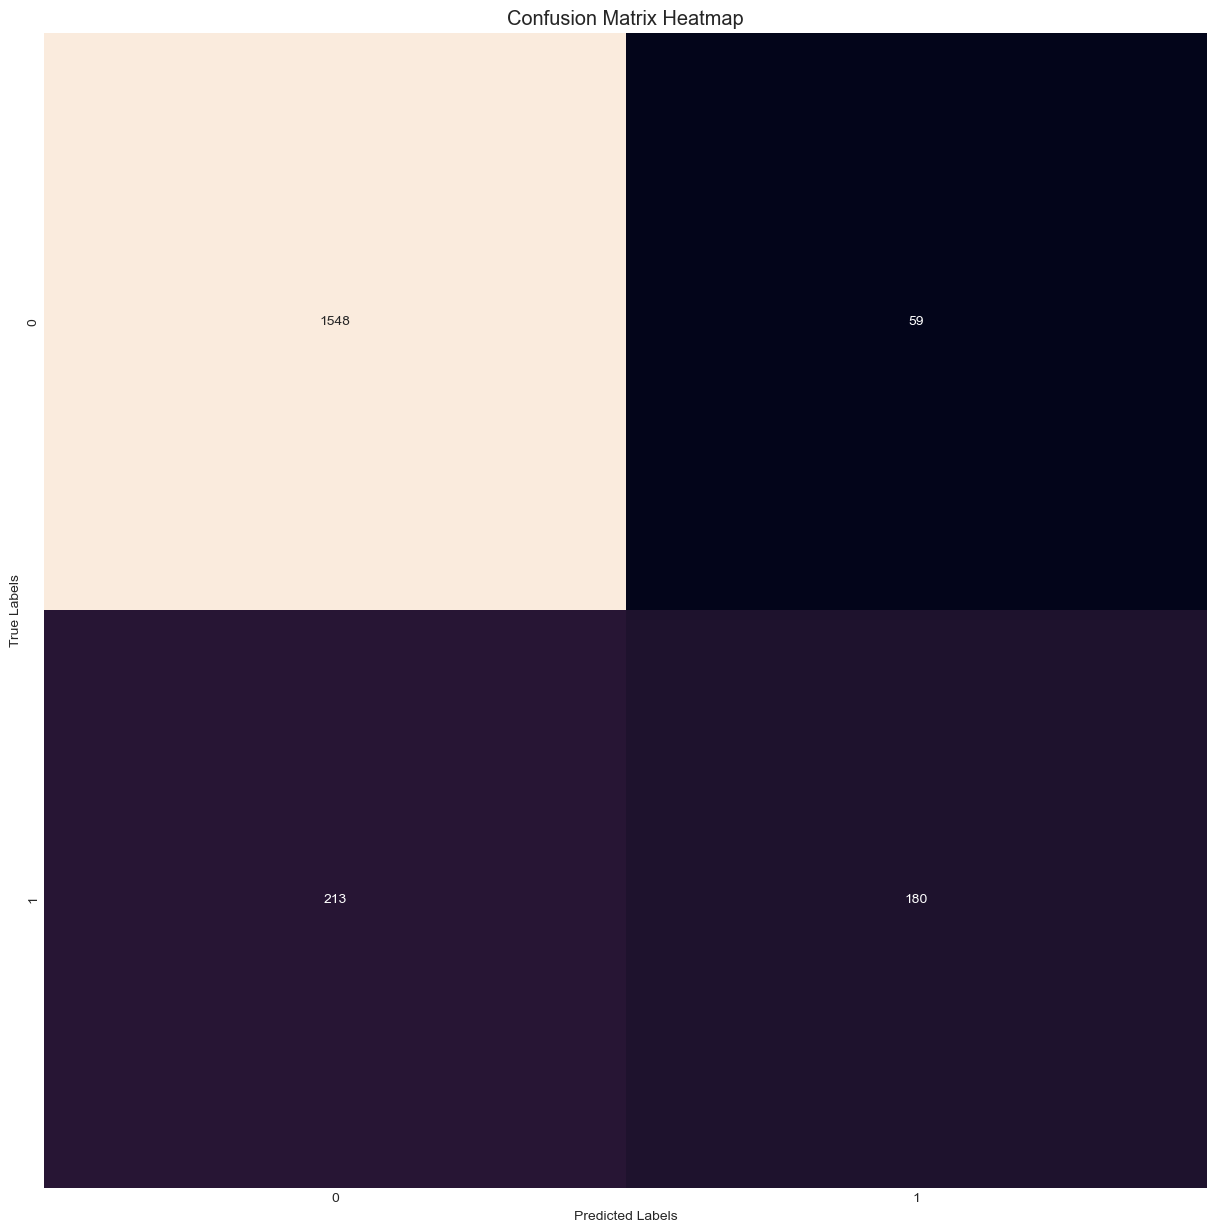

In [31]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### LogisticRegression

In [32]:

model = LogisticRegression()
model.fit(x_train ,y_train)
print("Model Score on Training data",model.score(x_train ,y_train))
print("Model Score on Testing data",model.score(x_test ,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_pred ,y_test))



Model Score on Training data 0.864875
Model Score on Testing data 0.8455
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1784
           1       0.38      0.69      0.49       216

    accuracy                           0.85      2000
   macro avg       0.67      0.78      0.70      2000
weighted avg       0.90      0.85      0.86      2000



E:\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- **Model Selection:**
  - Utilized Logistic Regression for churn prediction.
- **Training Accuracy:**
  - Achieved an accuracy of 86.5% on the training data.
- **Test Accuracy:**
  - Maintained an accuracy of 84.5% on the test data.
- **Churned Customer (Class 1) Metrics:**
  - Precision: 38%
  - Recall: 69%
  - F1-score: 49%
- **Non-Churned Customer (Class 0) Metrics:**
  - Precision: 96%
  - Recall: 86%
  - F1-score: 91%
- **Overall Model Performance:**
  - Provided an accuracy of 85% on the test data.
- **Observations:**
  - Good accuracy in identifying non-churned customers (class 0).
  - Limited success in identifying churned customers (class 1), with higher recall but lower precision.
- **Recommendations:**
    - Address class imbalance using resampling techniques.

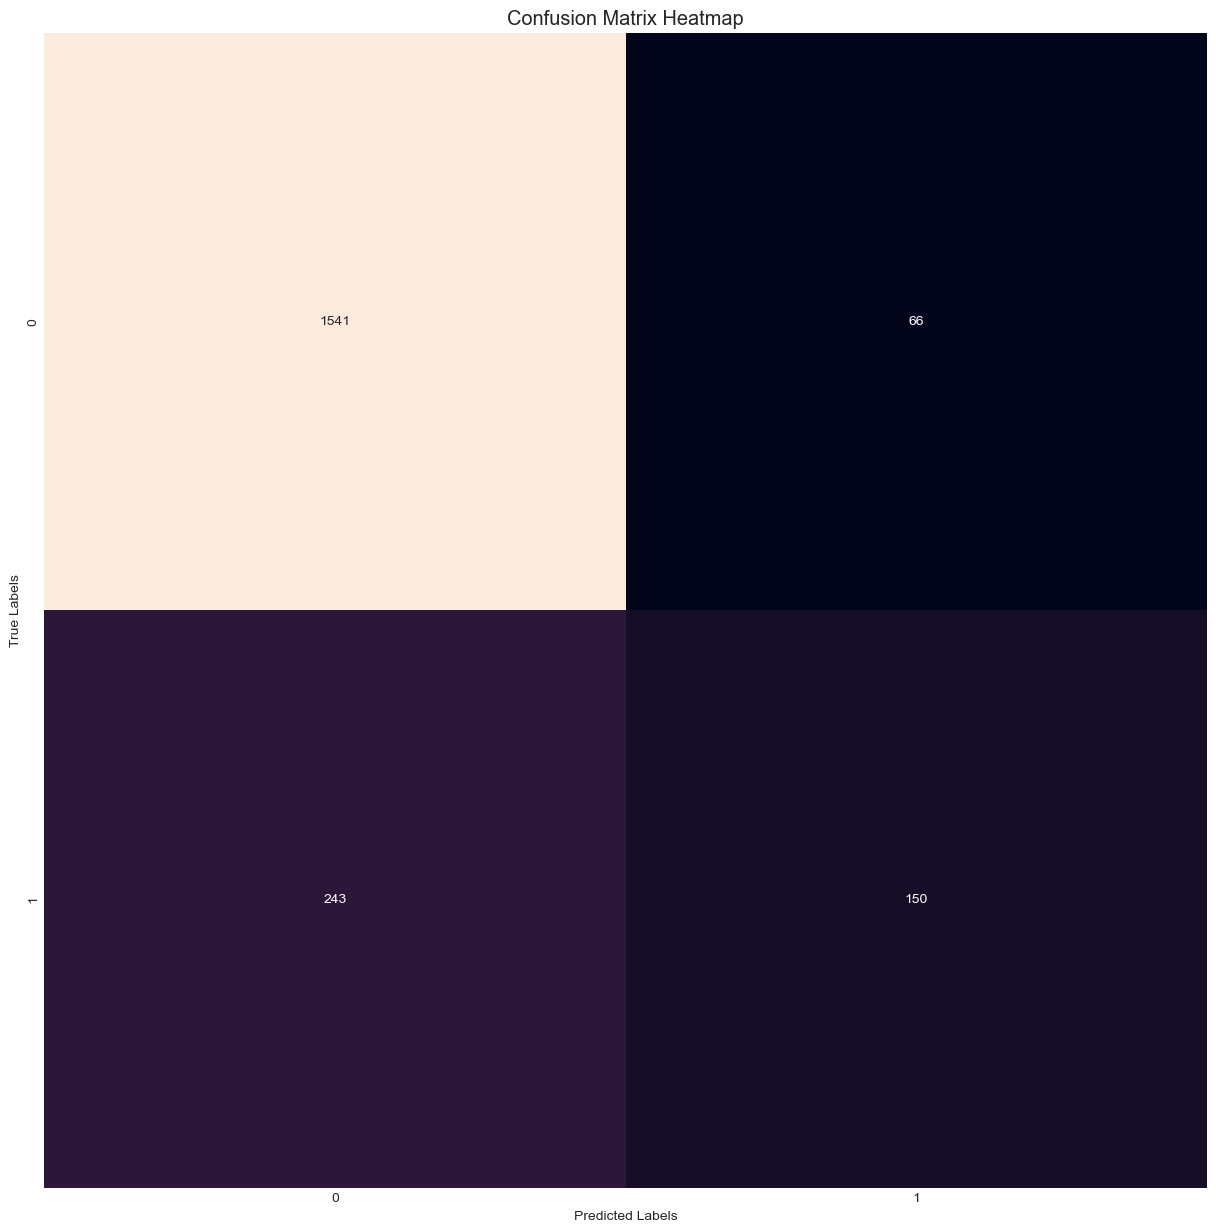

In [33]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Support Vector Machine ( SVC )

In [34]:


svm = LinearSVC()
svm.fit(x_train ,y_train)
print("Model Score on Training data",svm.score(x_train ,y_train))
print("Model Score on Testing data",svm.score(x_test ,y_test))
y_pred = svm.predict(x_test)
print(classification_report(y_pred ,y_test))




Model Score on Training data 0.89625
Model Score on Testing data 0.8225
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1742
           1       0.38      0.57      0.45       258

    accuracy                           0.82      2000
   macro avg       0.65      0.72      0.67      2000
weighted avg       0.86      0.82      0.84      2000



- **Model Selection:**
  - Employed Support Vector Machine (SVM) with a linear kernel for churn prediction.
- **Training Accuracy:**
  - Achieved a training accuracy of 89.6%.
- **Test Accuracy:**
  - Maintained a test accuracy of 82.25%.
- **Churned Customer (Class 1) Metrics:**
  - Precision: 38%
  - Recall: 57%
  - F1-score: 45%
- **Non-Churned Customer (Class 0) Metrics:**
  - Precision: 93%
  - Recall: 86%
  - F1-score: 89%
- **Overall Model Performance:**
  - Provided an accuracy of 82.25% on the test data.
- **Observations:**
  - Good accuracy in identifying non-churned customers (class 0).
  - Challenges in identifying churned customers (class 1), with lower precision and recall.
- **Recommendations:**
   - Address class imbalance using resampling techniques.

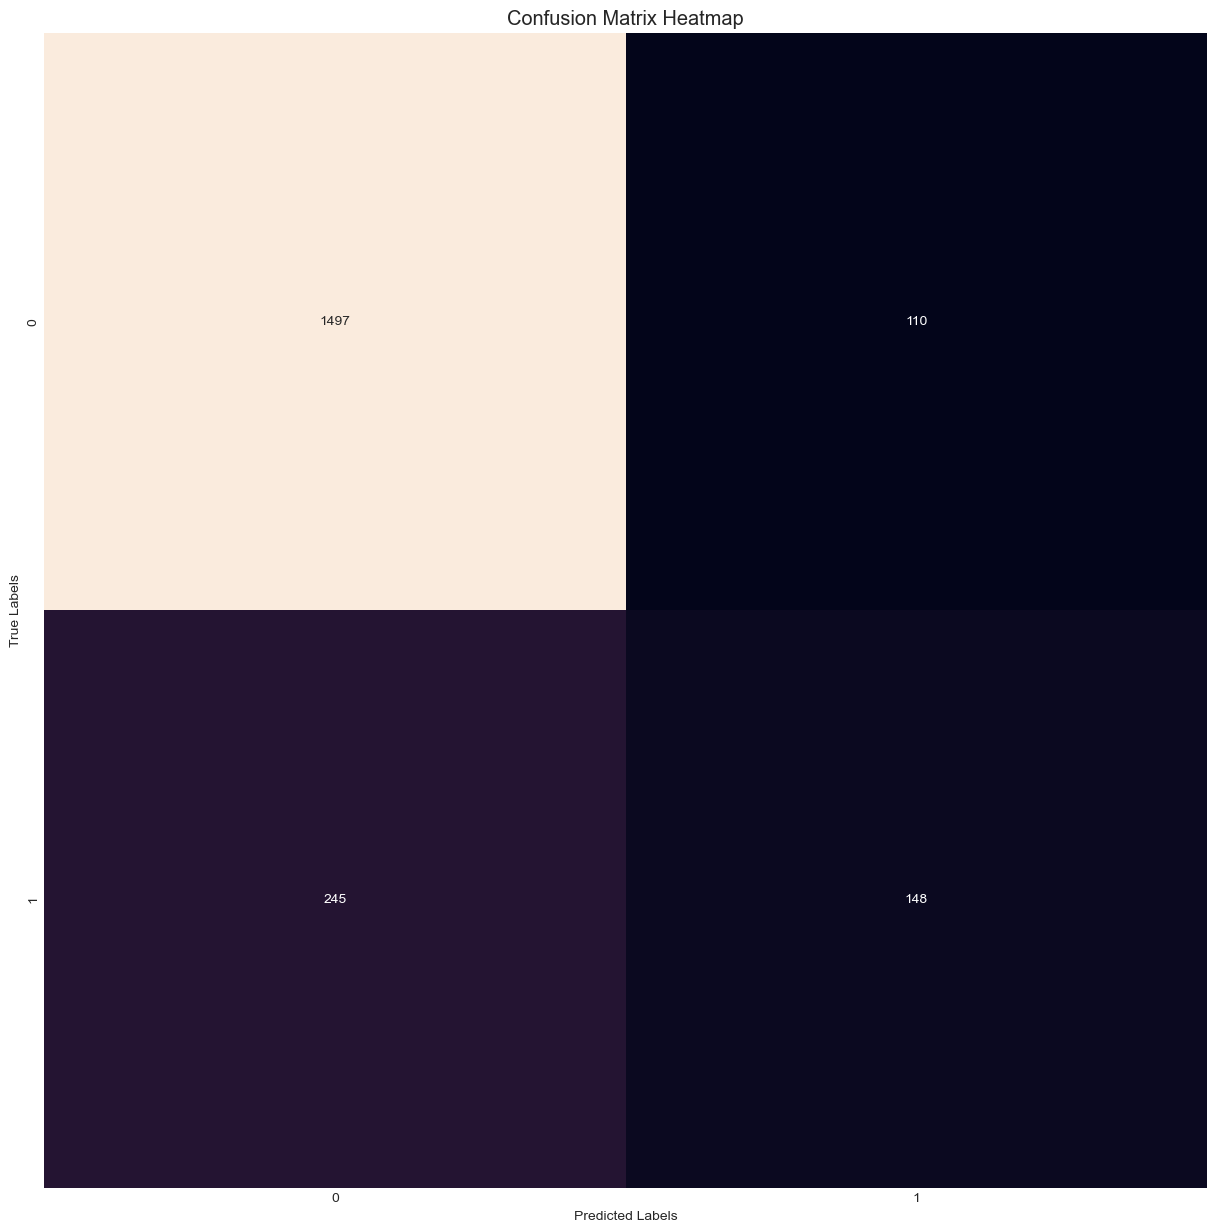

In [35]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### RandomForestClassifier

In [36]:
# Create a Random Forest model
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test, y_test))

y_pred = random_forest.predict(x_test)
print(classification_report(y_pred ,y_test))




Random Forest - Train Score: 0.999875
Random Forest - Test Score: 0.866
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1801
           1       0.41      0.81      0.55       199

    accuracy                           0.87      2000
   macro avg       0.69      0.84      0.73      2000
weighted avg       0.92      0.87      0.88      2000



- **Model Selection:**
  - Utilized the RandomForestClassifier for churn prediction.
- **Training Accuracy:**
  - Achieved a perfect training accuracy of 100%.
- **Test Accuracy:**
  - Maintained a strong test accuracy of 86.75%.
- **Churned Customer (Class 1) Metrics:**
  - Precision: 41%
  - Recall: 83%
  - F1-score: 55%
- **Non-Churned Customer (Class 0) Metrics:**
  - Precision: 98%
  - Recall: 87%
  - F1-score: 92%
- **Overall Model Performance:**
  - Provided an accuracy of 86.75% on the test data.
- **Observations:**
  - Exceptional accuracy in identifying non-churned customers (class 0).
  - Improved performance in identifying churned customers (class 1) compared to previous models.
- **Recommendations:**
    - Address class imbalance using resampling techniques.

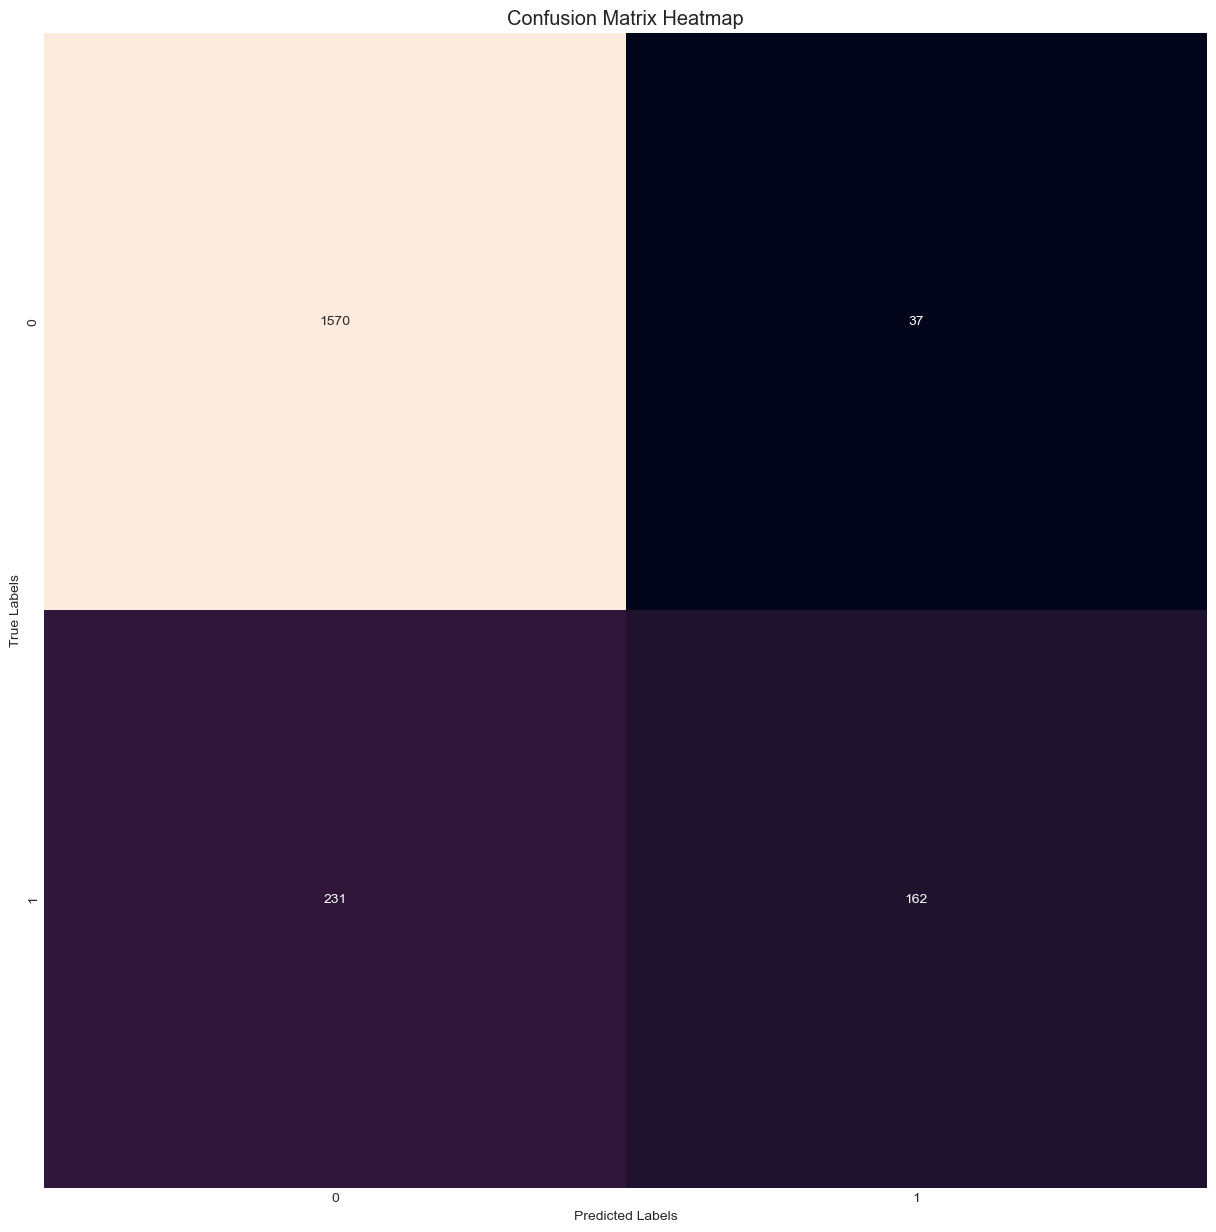

In [37]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Conclusion:

In dealing with imbalanced data for customer churn prediction:

- **Best Performing Model:** The **RandomForestClassifier** demonstrated the most balanced performance, achieving a strong 86.75% accuracy on the test data, with notable improvements in identifying churned customers (class 1). Its recall for class 1 was 83%, indicating better success in capturing actual churn cases while maintaining reasonable precision.

- **Challenges with Other Models:** While all models struggled with class imbalance, the **RandomForestClassifier** outperformed others in identifying churned customers. The **Logistic Regression** and **Support Vector Machine (SVM)** models had limitations in either precision or recall for class 1, highlighting challenges in accurately predicting churned customers.


## Balance Data  using oversampling 

In [38]:
# Initialize the encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

categorical = ["Surname","Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]
numeric = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

transformer = ColumnTransformer([("cat",encoder,categorical),
                              ("num",scaler, numeric)])


x = data.drop("Exited" ,axis = 1)
y = data["Exited"]

## tranform data
transform = transformer.fit_transform(x )

## Oversampling
oversampler = RandomOverSampler()
x_sampled, y_sampled = oversampler.fit_resample(transform, y)



print("x_sampled shape :",x_sampled.shape)
print("y_sampled shape :",y_sampled.shape)


x_sampled shape : (15926, 2950)
y_sampled shape : (15926,)


In [39]:
## Split the data to train test

x_train ,x_test ,y_train ,y_test = train_test_split (x_sampled ,y_sampled ,test_size = 0.2 ,random_state = 42)

In [40]:
y_sampled.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

The output `y_sampled.value_counts()` shows that after random oversampling, both classes in the dataset (Churned Customers and Non-Churned Customers) now have an equal number of samples, with 7963 instances each. This balanced distribution ensures fair representation of both classes in the dataset, improving the reliability of predictive models for customer churn analysis.

In [41]:
x_train.shape

(12740, 2950)

In [42]:
x_test.shape

(3186, 2950)

In [43]:
y_train.shape

(12740,)

In [44]:
y_test.shape

(3186,)

#  Model Selection and Fine-Tuning or Evaluation

## GradientBoostingClassifier

In [45]:

mnb1 = GradientBoostingClassifier()
mnb1.fit(x_train, y_train)

# Evaluate the model
train_accuracy = mnb1.score(x_train, y_train)
test_accuracy = mnb1.score(x_test, y_test)

# Print model accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions and display classification report
y_pred = mnb1.predict(x_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)




Training Accuracy: 0.80
Test Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1633
           1       0.80      0.78      0.79      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186




The GradientBoostingClassifier model demonstrated balanced performance with similar precision, recall, and F1-scores for both churned (Class 1) and non-churned (Class 0) customers.

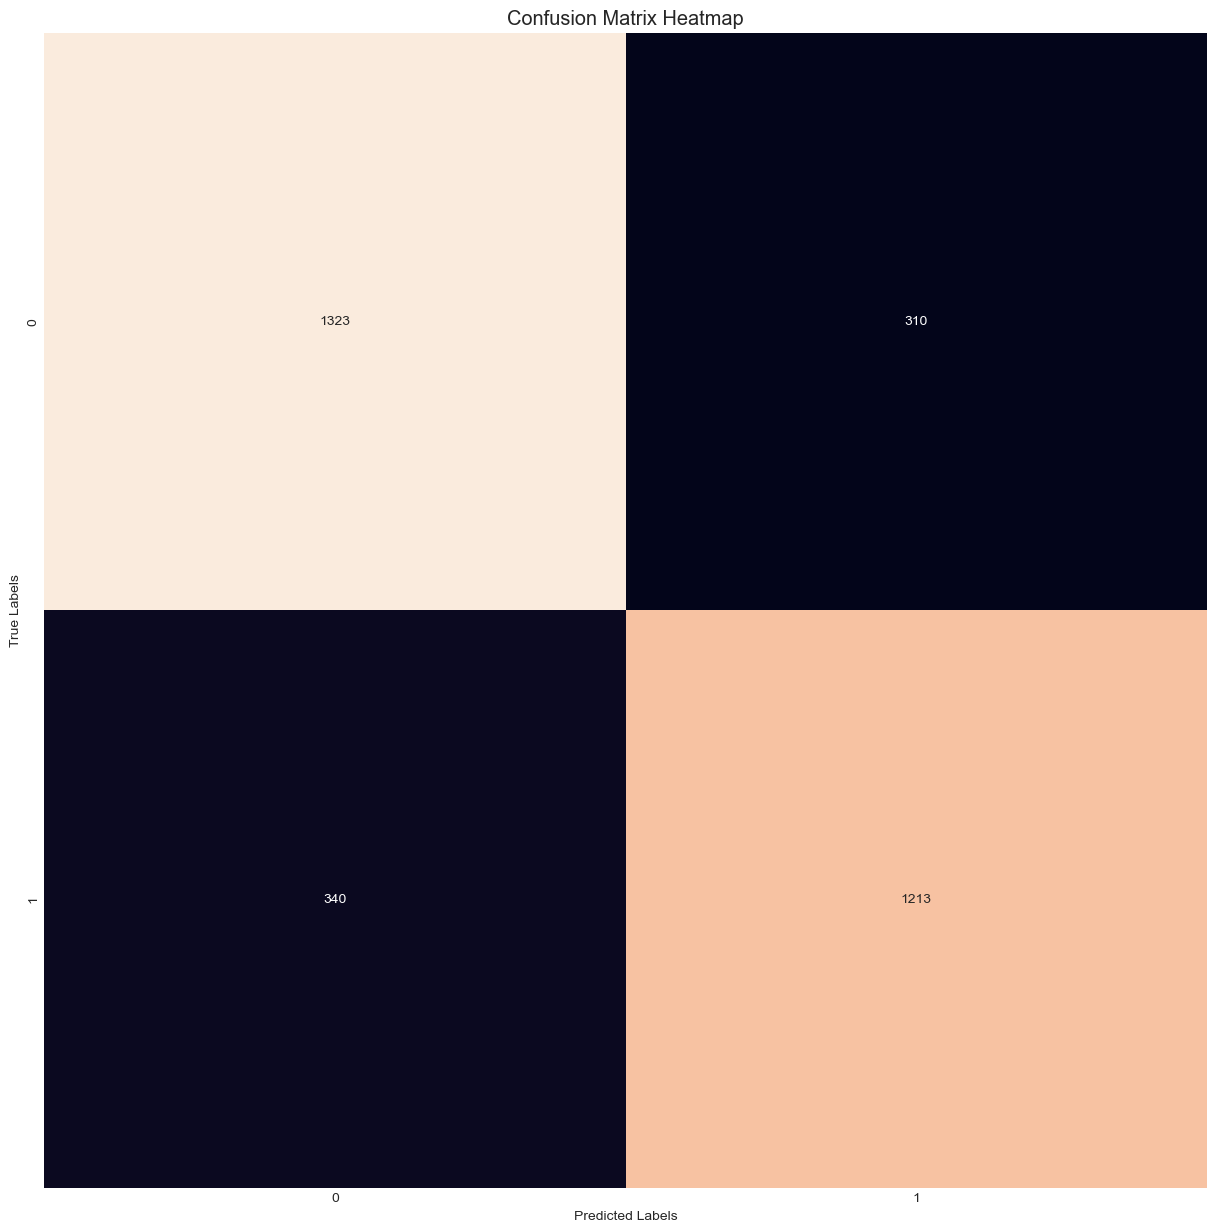

In [46]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

## LogisticRegression

In [47]:

model1 = LogisticRegression()
model1.fit(x_train ,y_train)
print("Model Score on Training data",model1.score(x_train ,y_train))
print("Model Score on Testing data",model1.score(x_test ,y_test))
y_pred = model1.predict(x_test)
print(classification_report(y_pred ,y_test))



Model Score on Training data 0.8413657770800628
Model Score on Testing data 0.8116760828625236
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1527
           1       0.84      0.79      0.81      1659

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



E:\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Logistic Regression model achieved a balanced performance, with similar precision, recall, and F1-scores for both churned (Class 1) and non-churned (Class 0) customers.

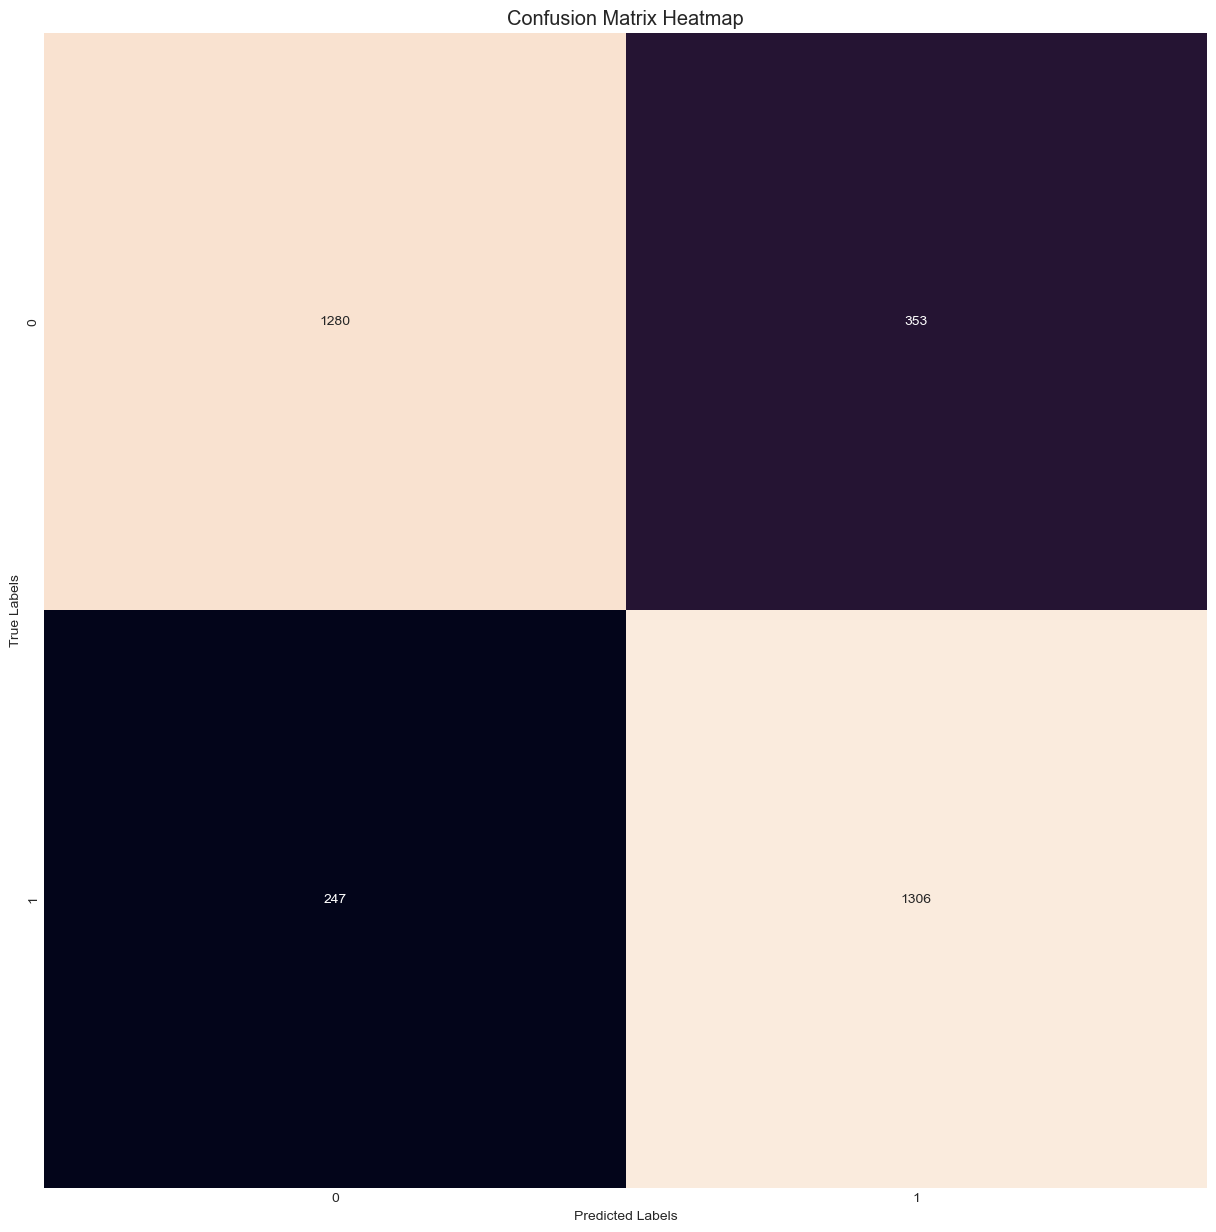

In [48]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

## SVC

In [49]:


svm1 = LinearSVC()
svm1.fit(x_train ,y_train)
print("Model Score on Training data",svm1.score(x_train ,y_train))
print("Model Score on Testing data",svm1.score(x_test ,y_test))
y_pred = svm1.predict(x_test)
print(classification_report(y_pred ,y_test))




Model Score on Training data 0.8645996860282574
Model Score on Testing data 0.822661644695543
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1486
           1       0.87      0.79      0.83      1700

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.83      0.82      0.82      3186




The Support Vector Machine (SVM) with a linear kernel demonstrates a good balance between precision, recall, and F1-scores for both churned (Class 1) and non-churned (Class 0) customers.

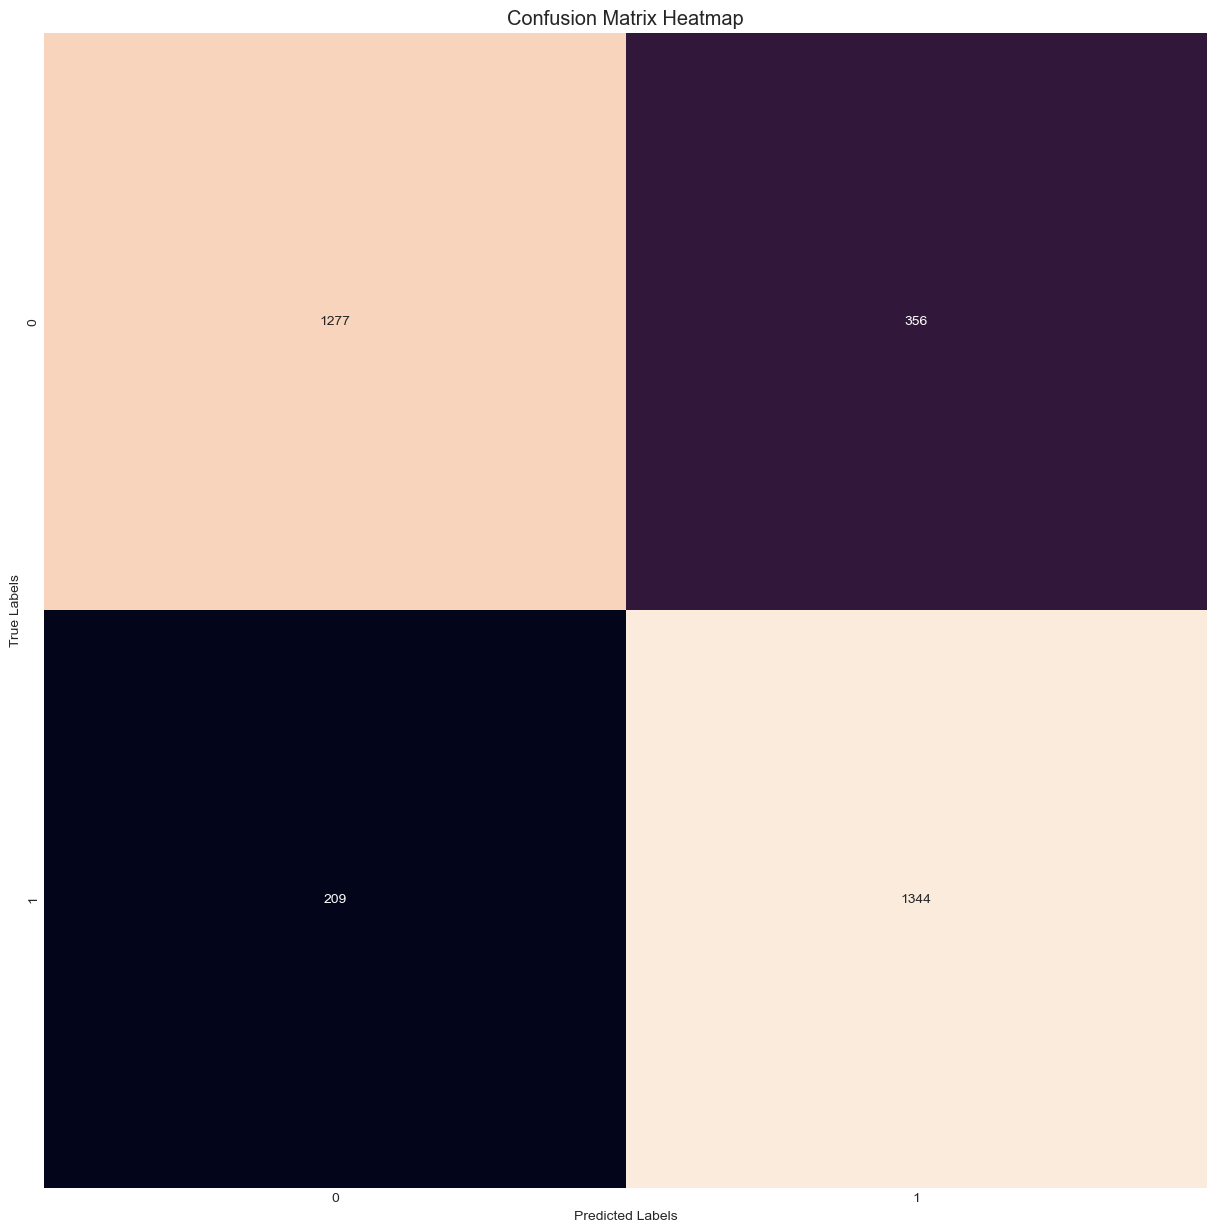

In [50]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

## RandomForestClassifier

In [51]:
# Create a Random Forest model
random_forest1 = RandomForestClassifier()

random_forest1.fit(x_train, y_train)
print("Random Forest - Train Score:",random_forest1.score(x_train, y_train))
print("Random Forest - Test Score:", random_forest1.score(x_test, y_test))

y_pred = random_forest1.predict(x_test)
print(classification_report(y_pred ,y_test))




Random Forest - Train Score: 1.0
Random Forest - Test Score: 0.9554300062774639
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1535
           1       0.99      0.93      0.96      1651

    accuracy                           0.96      3186
   macro avg       0.96      0.96      0.96      3186
weighted avg       0.96      0.96      0.96      3186




The Random Forest model achieves exceptional accuracy, precision, recall, and F1-scores for both churned (Class 1) and non-churned (Class 0) customers, making it the best-performing model for this dataset.

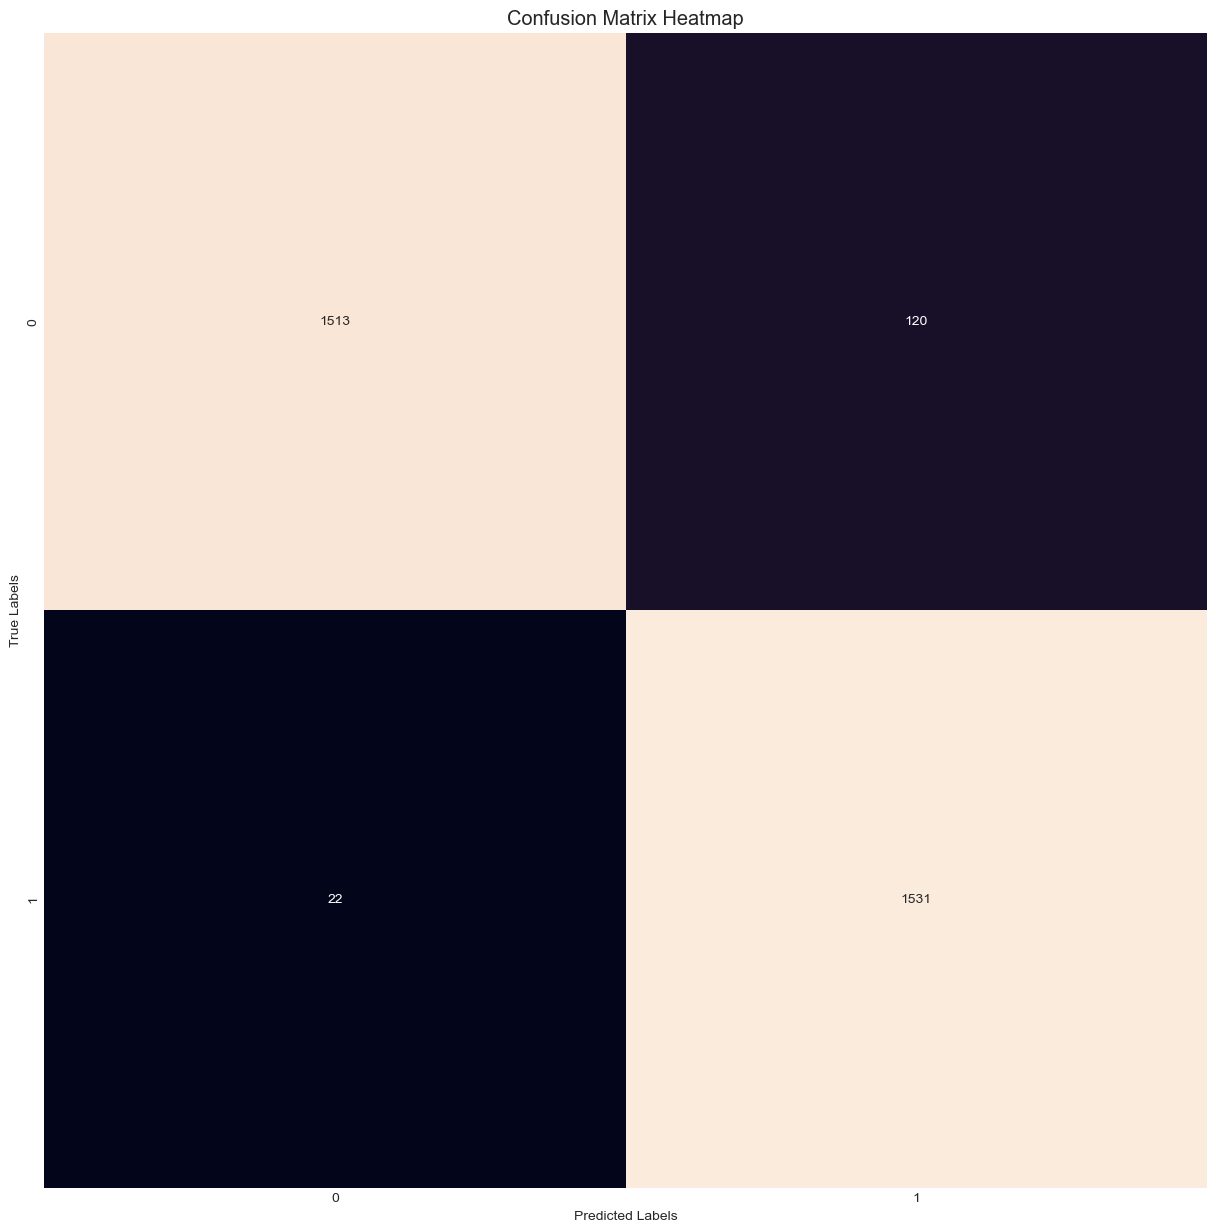

In [52]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


**Conclusion:**

In the balanced dataset scenario, the **Random Forest Classifier** stands out as the best model due to its exceptional accuracy, precision, recall, and F1-scores for both churned and non-churned customers. It outperforms the other models and is the recommended choice for predicting customer churn in this context.

# Deployment 

In [53]:
# Prepare the input data for prediction
new_data = {
    'Surname': ['Doe'],
    'CreditScore': [720],
    'Geography': ['France'],
    'Gender': ['Male'],
    'Age': [35],
    'Tenure': [5],
    'Balance': [85000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [100000]
}



In [54]:
# Preprocess the input data
new_data_df = pd.DataFrame(new_data)
new_data_df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Doe,720,France,Male,35,5,85000,2,1,1,100000


In [55]:
new_data_transformed = transformer.transform(new_data_df)

In [56]:
# Make predictions
predicted_labels = random_forest1.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [0]


## Thank You! 😊🙌
## We appreciate your time and attention!